In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import norm

# Modelisation and experimental context

We want to draw the random statics of multi-colocalization from RNA of N different populations with different abundancies (a1,a2...aN).

Let's try to modelize the spatial distributions of RNAs as an urn drawing problem.

**Context**

Let us consider *V* differently **numbered balls** in the urn. In our experiement a cell has *V* pixels we can resolve to find our RNAs, in other words V different positions. Each time a ball is drawn (e.g a position) it is **replaced** in the urn for the next RNA.

For each RNA we draw *aN* positions. Let's try to sequentially draw each positions.

## First distribution, N = 1

For the first distribution the probability to co-localize with any other distribion will obviously be 0. But we can have a look at the probability of self-colocalization.

At any draw the probability of have a chosen position is 1 out V positions :  *1/V* since positions are replaced in the urn.

Let us call k the iterations of drawing, the number of draws to perform is *a1*.

* At k=1, first drawing :

    The probability of self-colocalization is 0

* At k=2, :

    The probability of picking the position drawn in k=1 is **1/V** (ie self colocalization probality).
Or in other word the probablity of picking a new position is **1-1/V**.

* At k=3 : 

    Things complexify as the probability now depends on the outcome of k=2.
To adress this let us consider the probablity the position we drew was never drawn.
So this specific postion has 1/V chance to be drawn at first draw and then again 1/V, we can view this a binomial trial without any sucess
so this probability is (1/V)².

* At k>2 :

     the probability that at draw k the picked position was never drawn is a binomial trial without any sucess : **(1/V)^k**.


In [3]:
V = 200
a1 = 100
experiment_number = 10000


In [4]:
random_generator = np.random.default_rng()
draws = random_generator.integers(low=1, high=V+1, size=(experiment_number,a1))
draws

array([[118,  71, 185, ...,  91, 162,  11],
       [137,  14,  40, ...,  63, 148,  43],
       [175,  37,   3, ..., 159, 181, 107],
       ...,
       [189,  93,  98, ...,  49, 176,  20],
       [ 12,  52, 184, ...,  69, 182,  77],
       [192,   3, 126, ..., 152,  10, 122]])

In [5]:
colocalisation_count = []
for experiment in draws :
    colocalisation_count.append(len(experiment) - len(np.unique(experiment)))

In [6]:
p = 1-(1-1/V)**a1 #

x = np.arange(a1 +1 )
pmf = binom.pmf(x,a1, p)

expceted_number_colocalisation = a1- V*p

print("expected_number_colocalisation : ",expceted_number_colocalisation)

fig = plt.figure(figsize=(20,10))
ax = fig.gca()

ax.hist(colocalisation_count, edgecolor='black', bins=len(np.unique(colocalisation_count)), align='mid', density=True)

ax.set_xlim(0,a1)
ax.plot(x, pmf, 'ok', label= "Probability that a specific location is drawn at least one time")
xmin,xmax,ymin,ymax = plt.axis()
ax.plot([expceted_number_colocalisation,expceted_number_colocalisation],[ymin,ymax], '--r')
ax.legend()

plt.axis([xmin,xmax,ymin,ymax])





expected_number_colocalisation :  21.154087298145583


(0.0, 100.0, 0.0, 0.128415)

## Two distribution, N= 2

In [84]:
V = 200
a1 = 100
a2 = 150
experiment_number = 1000000

Expected_number_different_a1_positions = V*(1-(1-(1/V))**a1)
Expected_number_different_a1_positions

78.84591270185442

In [103]:
random_generator = np.random.default_rng()
a_1_draws = random_generator.integers(low=1, high=V+1, size=(experiment_number,a1))
draws = random_generator.integers(low=1, high=V+1, size=(experiment_number,a2))
draws

array([[155,  92,  73, ...,  37,  32,  60],
       [112, 139, 176, ..., 116,  88, 197],
       [120, 166,  59, ..., 165,  42,  18],
       ...,
       [ 11, 103,  99, ..., 165,  13,  78],
       [ 45, 120,  87, ..., 103,  91,   4],
       [173, 188,  82, ..., 114,  95, 102]])

In [110]:
colocalisation_count = []
different_pairs = []
for experiment, a_1_sample in zip(draws, a_1_draws) :
    
    colocalisation_count.append(len(
        experiment[np.isin(experiment, a_1_sample)]
    ))

    # different_pairs.append(len(
    #     np.unique(experiment[np.isin(experiment, a_1_sample)])
    # ))

In [ ]:
truth_table  = (draws[:,:,None] == a_1_draws[:,None,:]).any(axis=2)
colocalisation_count_test = truth_table.sum(axis=1)


In [ ]:
all(colocalisation_count_test == colocalisation_count)

True

In [87]:
def compute_colocalization_count_expectancy(a1_unique, a2, V) :
    """
    Compute the expected number of colocalization events which corresponds to a binomial law of sucess probability of a2 picking a position occupied by the a1_unique particules amongst the V postions.
    Expectancy = np
    
    """
    
    if V == 0 : return np.NaN #No positions available.
    
    coloc_count = a2 * a1_unique/V
    
    return coloc_count

In [88]:
def compute_colocalization_count_std(a1_unique, a2, V) :
    """
    Compute standard deviation of expected number of colocalization events which corresponds to a binomial law of sucess probability of a2 picking a position occupied by the a1_unique particules amongst the V postions.
    Std = np(1-p)
    """
    
    if V == 0 : return np.NaN #No positions available.
    
    std = a2 * a1_unique/V * (1-a1_unique/V)
    
    return std

In [89]:
def compute_unique_pair_expectancy(a1_unique, a2, V) :
    """
    Compute expected number of unique pair formed between a2 singles and a1_unique singles when the number of positions available is V.
    """
    if V == 0 : return np.NaN
    
    unique_pair_count = a1_unique*(1-(1-1/V)**a2)
    
    return unique_pair_count

In [90]:
from math import comb

def compute_unique_pair_std(a1_unique, a2, V) :
    """
    Compute expected standard deviation of number of unique pair formed between a2 singles and a1_unique singles when the number of positions available is V.
    
    We use the formula of variance for a sum of random variables Ii.
    var = iSum(Var(I)) + 2*iSum(Cov(I))
    
    First term is called Exp
    second Cov
    
    Exp = Sum(p*(1-p)) (Bernoulli law)
     --> a1_unique *(p(1-p))
    
    Cov = E(Ii and Ij) - E(Ii)*E(Ij) (called Eij, Ei and Ej)
    
    """
    if V == 0 : return np.NaN
    
    p = 1 - (1-1/V)**a2 # probability to draw a specific location at least once
    Exp = a1_unique*p*(1-p) # Variance of bernouli law
    Cov = (1-2/V)**a2 - (1-1/V)**(2*a2) #Simplified expression for cov
    
    var = Exp + 2*comb(round(a1_unique),2)*Cov
    
    return np.sqrt(var)

In [91]:
# p = 1-(1-1/V)**a1 #

# x = np.arange(a1 +1 )
# pmf = binom.pmf(x,a1, p)


print("expected_number_colocalisation : ",expceted_number_colocalisation)

fig = plt.figure(figsize=(20,10))
top,bot = fig.subplots(2,1)

#Co-localisation fraction
expected_colocalization_fraction = (a2*Expected_number_different_a1_positions)/V
std = np.sqrt(expected_colocalization_fraction* (1-Expected_number_different_a1_positions/V))

count,bins,_ =top.hist(colocalisation_count, edgecolor='black', bins=len(np.unique(colocalisation_count)), align='mid', density=True, label='simulated colocalization fraction')

top.plot(norm.pdf(np.linspace(0,a2,a2), expected_colocalization_fraction, std), label= 'analytic density')

xmin,xmax,ymin,ymax = top.axis()
top.plot([expected_colocalization_fraction,expected_colocalization_fraction],[ymin,ymax], '--r', label= 'model expectancy')
top.legend()
top.axis([0,a2,ymin,ymax])


#Cluster number forming pairs
expected_number_of_unique_pairs = Expected_number_different_a1_positions*(1-(1-1/V)**a2)
std = compute_unique_pair_std(Expected_number_different_a1_positions, a2, V)
print("expected_number_of_unique_pairs : ",expected_number_of_unique_pairs)

bot.hist(different_pairs, edgecolor='black', bins=len(np.unique(different_pairs)), align='mid', density=True, label='simulated unique pair count')
bot.plot(norm.pdf(np.linspace(0,a2,a2), expected_number_of_unique_pairs, std), label= 'analytic density')
xmin,xmax,ymin,ymax = bot.axis()
bot.plot([expected_number_of_unique_pairs,expected_number_of_unique_pairs],[ymin,ymax], '--r', label= 'model expectancy')
bot.legend()
bot.axis([0,a2,ymin,ymax])


expected_number_colocalisation :  21.154087298145583
expected_number_of_unique_pairs :  41.67174133032364


***Notes***

* **Expand to higher dimension**    
    It might be possible to extend this model to higher N dimensions, however to process our data with high N (10<=N<=30). We choose to test    statistically our each pair of RNAs (2 amongst 30). And then to use again the N=2 to test pairs that passed the test with each RNA.

* **Perfection co-localization assumption**  
    This models consider perfectly co-localizing molecules, in other words, identical coordinates for detection. In practice due to interaction distance, microscope resolution and variability in drift/aberration correction a co-localization distance can be introduced. This can be taken into account by reducing the available number of positions with  **reduced_volume** = ***number of pixel in colocalization distance radius***/***V***.


    However this will introduce **edge effects**, where the volume of pixel scanned by colocalization radius will not be the number of pixel in co-localization radius. One can argue that this effect will be negligible depending on colocalization_radius / cell_radius. Also this biais might be lower that the one given by the assumption that single molecules positions follows an uniform probability density in space in the absence of interaction.

* **Functionnal implementation**  
    A functionnal implementation of this code is available in analysis/models.py

# How does this model performs confronted to prior simulation ?

I previously ran a simulation based on the number of pixel per slice and using a co-localization distance > 1 px. Let see how this model compare when correcting and when not correcting for co-localization distance.

## Simulation results

In [44]:
import numpy as np
import pandas as pd

In [45]:
def get_squared_shape(area, dim=2) :
    c = np.float_power(area, 1/dim)
    
    c = int(np.round(c))
    return (c,)*dim

dim = 2
area =25000
get_squared_shape(area, dim=dim)

(158, 158)

In [46]:
def create_planes_with_random_distribution(
    spot_number : int, 
    area : int, 
    colocalization_distance : int, 
    voxel_size : tuple,  
    random_generator : np.random.Generator = None,
    ) :
    
    z_range = int(np.floor(colocalization_distance/voxel_size[0]))
    n_layers = 2*z_range + 1
    shape = get_squared_shape(area)
    
    if random_generator is None :
        random_generator = np.random.default_rng()
    
    random_spots = random_generator.integers(
        low=[0,0],
        high=shape,
        size=(spot_number * n_layers, 2)
    )
    
    
    z_coords = np.arange(n_layers * spot_number)
    z_coords = z_coords.reshape(n_layers*spot_number,1) % n_layers
    
    random_spots_array =  np.concatenate([z_coords, random_spots], axis=1)
    random_spots_array *= voxel_size
    
    return random_spots_array

In [47]:
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm

def create_NearestNeighbors_models(spots : np.ndarray, colocalization_distance : int,) :
   return NearestNeighbors(n_neighbors=1, radius=colocalization_distance).fit(spots)

In [48]:
def compute_colocalization_rate(test_number : int, area : int, model : NearestNeighbors, colocalization_distance, voxel_size) :
    z_range = int(np.floor(colocalization_distance/voxel_size[0]))
    shape = get_squared_shape(area)
    
    z = np.floor(z_range/2) #midle stack
    
    random_generator = np.random.default_rng()
    spots = random_generator.integers(
        low=[z,0,0],
        high=(z+1,) + shape,
        size=(test_number,3)
    )
    
    spots *=voxel_size
    
    distances, indices = model.kneighbors(spots)
    
    success_rate = (distances <= colocalization_distance).sum()
    success_rate /= test_number
    
    return success_rate
    

In [49]:
def run_random_coloc_simulation(
    area : int,
    spot_number_per_plane : int,
    n_test : int,
    voxel_size : tuple,
    colocalization_distance : int
) :
    
    random_spots_array = create_planes_with_random_distribution(
        spot_number=spot_number_per_plane,
        area=area,
        colocalization_distance=colocalization_distance,
        voxel_size=voxel_size,
    )
    model = create_NearestNeighbors_models(random_spots_array, colocalization_distance=400)
    
    colocalization_rate = compute_colocalization_rate(
        test_number=n_test,
        area=area,
        model=model,
        colocalization_distance=colocalization_distance,
        voxel_size=voxel_size
    )
    
    res = (
        area,
        spot_number_per_plane,
        colocalization_rate
    )
    
    return res

### colocalization_distance = 1 px

In [50]:
n_test = 100000
voxel_size = (200,97,97)
colocalization_distance = 96

min_area = 10000
max_area = 140000
points_number = 100

data = []

for area in tqdm(np.linspace(min_area, max_area, points_number)) :
    for spot_number_per_plane in range(2, 10) :
        
        data_point = run_random_coloc_simulation(
            area=area,
            spot_number_per_plane=spot_number_per_plane,
            n_test=n_test,
            voxel_size=voxel_size,
            colocalization_distance=colocalization_distance
        )
        
        data.append(data_point)

100%|██████████| 100/100 [00:10<00:00,  9.99it/s]


In [51]:
dataframe = pd.DataFrame(columns= ['area','spot_number', 'colocalization_rate'], data=data)
dataframe

,area,spot_number,colocalization_rate
0,10000.0,2,0.00022
1,10000.0,3,0.00038
2,10000.0,4,0.00035
3,10000.0,5,0.00050
4,10000.0,6,0.00071
...,...,...,...
795,140000.0,5,0.00003
796,140000.0,6,0.00007
797,140000.0,7,0.00004
798,140000.0,8,0.00006


#### Visualisation

In [52]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

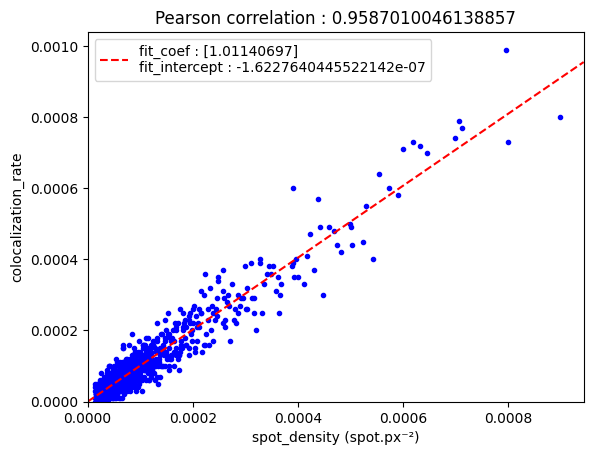

In [53]:
dataframe['spot_density'] = dataframe['spot_number'] / dataframe['area']
dataframe = dataframe.sort_values('spot_density')
correlation_coefficient = dataframe['colocalization_rate'].corr(dataframe['spot_density'])

linear_fit = LinearRegression().fit(dataframe['spot_density'].to_numpy().reshape(-1,1), dataframe['colocalization_rate'])

fit_coef = linear_fit.coef_
fit_intercept = linear_fit.intercept_

fig = plt.figure()
ax = fig.gca()

ax.plot(dataframe['spot_density'], dataframe['colocalization_rate'], '.b')


ax.set_xlabel('spot_density (spot.px⁻²)')
ax.set_ylabel('colocalization_rate')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_title(f"Pearson correlation : {correlation_coefficient}")

xmin,xmax,ymin,ymax = plt.axis()

ax.plot([xmin, xmax], [xmin* fit_coef + fit_intercept, xmax*fit_coef + fit_intercept], '--r', label = f"fit_coef : {fit_coef}\nfit_intercept : {fit_intercept}")
ax.legend()


### Colocalization distance = 2 px z or 4 px xy

In [54]:
n_test = 100000
voxel_size = (200,97,97)
colocalization_distance = 400

min_area = 10000
max_area = 140000
points_number = 100

data = []

for area in tqdm(np.linspace(min_area, max_area, points_number)) :
    for spot_number_per_plane in range(2, 10) :
        
        data_point = run_random_coloc_simulation(
            area=area,
            spot_number_per_plane=spot_number_per_plane,
            n_test=n_test,
            voxel_size=voxel_size,
            colocalization_distance=colocalization_distance
        )
        
        data.append(data_point)

100%|██████████| 100/100 [00:14<00:00,  6.96it/s]


In [55]:
dataframe = pd.DataFrame(columns= ['area','spot_number', 'colocalization_rate'], data=data)
dataframe

,area,spot_number,colocalization_rate
0,10000.0,2,0.02325
1,10000.0,3,0.03525
2,10000.0,4,0.04920
3,10000.0,5,0.06515
4,10000.0,6,0.07657
...,...,...,...
795,140000.0,5,0.00470
796,140000.0,6,0.00616
797,140000.0,7,0.00603
798,140000.0,8,0.00741


In [56]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

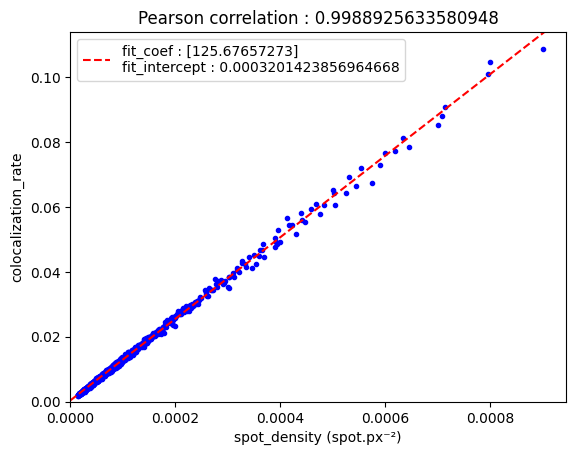

In [57]:
dataframe['spot_density'] = dataframe['spot_number'] / dataframe['area']
dataframe = dataframe.sort_values('spot_density')
correlation_coefficient = dataframe['colocalization_rate'].corr(dataframe['spot_density'])

linear_fit = LinearRegression().fit(dataframe['spot_density'].to_numpy().reshape(-1,1), dataframe['colocalization_rate'])

fit_coef = linear_fit.coef_
fit_intercept = linear_fit.intercept_

fig = plt.figure()
ax = fig.gca()

ax.plot(dataframe['spot_density'], dataframe['colocalization_rate'], '.b')


ax.set_xlabel('spot_density (spot.px⁻²)')
ax.set_ylabel('colocalization_rate')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_title(f"Pearson correlation : {correlation_coefficient}")

xmin,xmax,ymin,ymax = plt.axis()

ax.plot([xmin, xmax], [xmin* fit_coef + fit_intercept, xmax*fit_coef + fit_intercept], '--r', label = f"fit_coef : {fit_coef}\nfit_intercept : {fit_intercept}")
ax.legend()


## Using model without correction

Let's try to use our model out of the box without other correction.
We want to plot the predicted co-localization rate vs the spot_density condition we gave it.


In [60]:
from Sequential_Fish.analysis._models import compute_colocalization_count_expectancy
from Sequential_Fish.analysis._models import compute_colocalization_count_std
from Sequential_Fish.analysis._models import compute_unique_position_expectancy


In our simulation spot density goes from ***2/max_area*** to ***10/min_area*** 

In [61]:
density_bounds = (2/max_area, 10/min_area) #spot.px⁻¹
density_bounds

(1.4285714285714285e-05, 0.001)

In [62]:
fixed_volume = 50000 #px; Volume is fixed and spots abudancy is changed to match spots density
spots_abundancy = [fixed_volume* density for density in density_bounds]
spots_abundancy

[0.7142857142857143, 50.0]

In [63]:
points_number = 100
data = []

a2 = 100
spots_density = np.linspace(spots_abundancy[0],spots_abundancy[1], points_number) / fixed_volume

for a1 in np.linspace(spots_abundancy[0],spots_abundancy[1], points_number) :
    expected_unique_positions = compute_unique_position_expectancy(a1, V=fixed_volume)
    expected_coloc_rate = compute_colocalization_count_expectancy(
        a1_unique=expected_unique_positions,
        a2=a2,
        V=fixed_volume
    ) /a2
    
    data.append(expected_coloc_rate)

### Visualisation

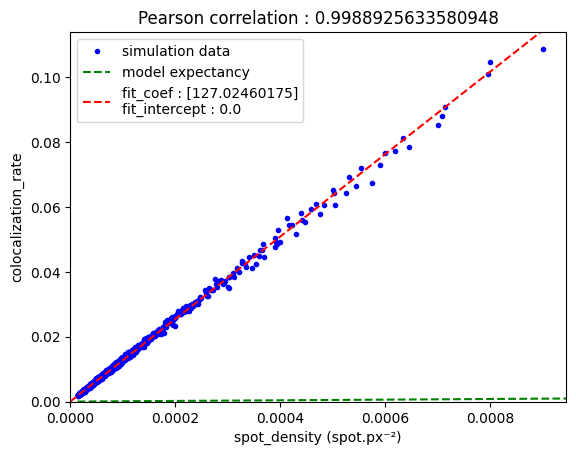

In [64]:
dataframe['spot_density'] = dataframe['spot_number'] / dataframe['area']
dataframe = dataframe.sort_values('spot_density')
correlation_coefficient = dataframe['colocalization_rate'].corr(dataframe['spot_density'])

linear_fit = LinearRegression(fit_intercept=False).fit(dataframe['spot_density'].to_numpy().reshape(-1,1), dataframe['colocalization_rate'])

fit_coef = linear_fit.coef_
fit_intercept = linear_fit.intercept_

fig = plt.figure()
ax = fig.gca()

ax.plot(dataframe['spot_density'], dataframe['colocalization_rate'], '.b', label= 'simulation data')


ax.set_xlabel('spot_density (spot.px⁻²)')
ax.set_ylabel('colocalization_rate')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_title(f"Pearson correlation : {correlation_coefficient}")

model_plot = ax.plot(spots_density,data, '--g', label = 'model expectancy')

xmin,xmax,ymin,ymax = plt.axis()

fit_plot = ax.plot([xmin, xmax], [xmin* fit_coef + fit_intercept, xmax*fit_coef + fit_intercept], '--r', label = f"fit_coef : {fit_coef}\nfit_intercept : {fit_intercept}")
legend = ax.legend()

Simulation is much closer to our real data and we can see model cannot be used as such without correction for co-localization distance

## Using model with correction for co-localization radius

Now let's try to correct volume with co-localization_distance


### Correcting volume

In [65]:
from scipy.ndimage import distance_transform_edt

In [66]:
voxel_size = (200,97,97)
coloc_distance = 400

In [67]:
shape = np.array([s +1 if s%2 == 0 else s for s in voxel_size], dtype=int) # Creating over sized array to scan within how many pixel are closer than radius

print(shape) # shape of coloc radius
print(tuple(np.floor(shape/2).astype(int))) # middle index

map = np.ones(shape=shape)
map[tuple(np.floor(shape/2).astype(int))] = 0
map = distance_transform_edt(map, sampling=voxel_size)

scanned_pixel = (map <= coloc_distance).sum()
scanned_pixel

[201  97  97]
(100, 48, 48)


133

In [68]:
corrected_volume = fixed_volume/scanned_pixel

### call model

In [69]:
points_number = 100
data = []

a2 = 100
spots_density = np.linspace(spots_abundancy[0],spots_abundancy[1], points_number) / fixed_volume # here volume is fixed volume not corrected volume

for a1 in np.linspace(spots_abundancy[0],spots_abundancy[1], points_number) :
    expected_unique_positions = compute_unique_position_expectancy(a1, V=corrected_volume)
    expected_coloc_rate = compute_colocalization_count_expectancy(
        a1_unique=expected_unique_positions,
        a2=a2,
        V=corrected_volume
    ) /a2
    
    data.append(expected_coloc_rate)

### Visualisation

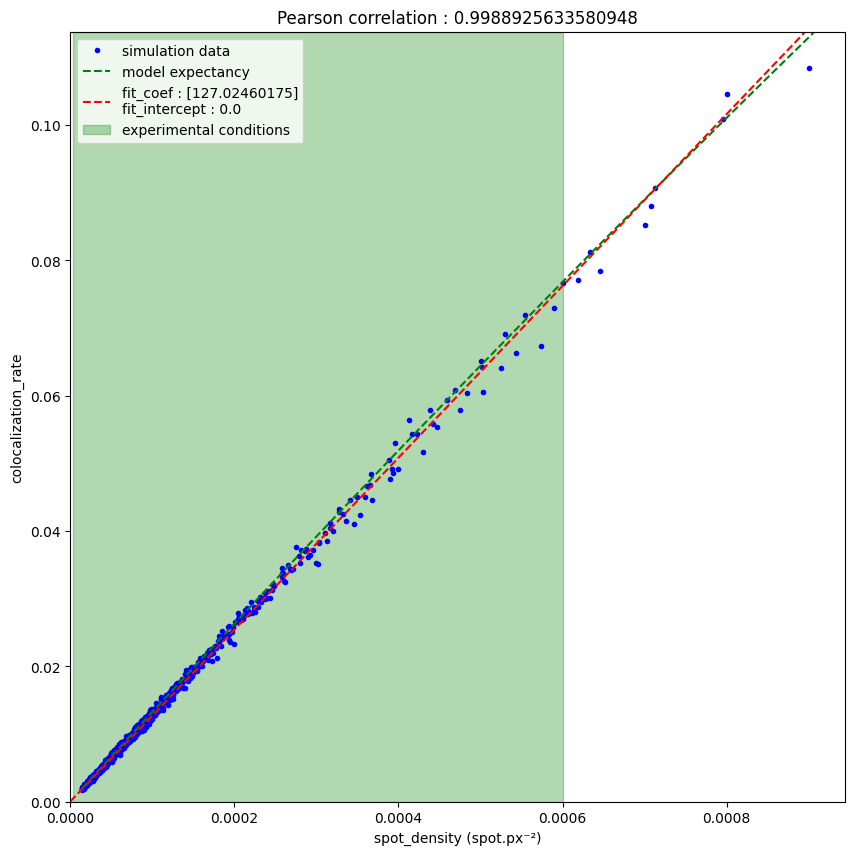

In [70]:
dataframe['spot_density'] = dataframe['spot_number'] / dataframe['area']
dataframe = dataframe.sort_values('spot_density')
correlation_coefficient = dataframe['colocalization_rate'].corr(dataframe['spot_density'])

linear_fit = LinearRegression(fit_intercept=False).fit(dataframe['spot_density'].to_numpy().reshape(-1,1), dataframe['colocalization_rate'])

fit_coef = linear_fit.coef_
fit_intercept = linear_fit.intercept_

fig = plt.figure(figsize = (10,10))
ax = fig.gca()

ax.plot(dataframe['spot_density'], dataframe['colocalization_rate'], '.b', label= 'simulation data')


ax.set_xlabel('spot_density (spot.px⁻²)')
ax.set_ylabel('colocalization_rate')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_title(f"Pearson correlation : {correlation_coefficient}")

model_plot = ax.plot(spots_density,data, '--g', label = 'model expectancy')


fit_plot = ax.plot([xmin, xmax], [xmin* fit_coef + fit_intercept, xmax*fit_coef + fit_intercept], '--r', label = f"fit_coef : {fit_coef}\nfit_intercept : {fit_intercept}")


xmin,xmax,ymin,ymax = plt.axis()

#Show experimental region
exp_min_area = 10000 #px per plane
exp_max_area = 150000 #px per plane
exp_spot_per_plane_min = 0.5
exp_spot_per_plane_max = 6
min_bound = exp_spot_per_plane_min/exp_max_area
max_bound = exp_spot_per_plane_max/exp_min_area

plt.axvspan(
    min_bound,
    max_bound,
    color='green',
    alpha=0.3,
    label= 'experimental conditions'
)

legend = ax.legend()


Model expectancy and simulation match really closely. This suggests that volume correction works and that edge effects are negligible.

# Let's try to build p-values test from models.py and colocalisation.py functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Sequential_Fish.analysis._models import compute_colocalization_count_expectancy, compute_colocalization_probability
from Sequential_Fish.analysis.colocalisation import create_coloc_rate_expectancy, _spots_merge_data, _compute_corrected_positions_number, _get_cell_area, _get_spot_per_plane, _get_spot_per_plane, _compute_spot_density

## Load data

In [2]:
PATH = "/media/floric/SSD 4To/SSD_floricslimani/Fish_seq/Davide/2024-10-02 - SeqFISH_Run9 - HeLa _POLR2"
Acquisition = pd.read_feather(PATH+'/result_tables/Acquisition.feather')
Detection = pd.read_feather(PATH+'/result_tables/Detection.feather')
Gene_map = pd.read_feather(PATH+'/result_tables/Gene_map.feather')
Spots = pd.read_feather(PATH+'/result_tables/Spots.feather')
Cell = pd.read_feather(PATH+'/result_tables/Cell.feather')

## Filter data

In [3]:
from Sequential_Fish.analysis.post_processing import Spots_filtering
Spots = Spots_filtering(
    Spots=Spots,
    Detection=Detection,
    Cell=Cell,
    filter_washout=True,
    segmentation_filter=True
)


## Constants

In [4]:
voxel_size = (200,97,97)
coloc_distance = 400

## Merge Data

In [5]:
Spots = _spots_merge_data(
    Spots=Spots,
    Acquisition=Acquisition,
    Detection=Detection,
    Gene_map=Gene_map,
    Cell=Cell
)
Spots

,spot_id,cluster_id,drifted_z,drifted_y,drifted_x,intensity,population,detection_id,acquisition_id_x,drift_z,...,nucleus_mean_max_signal,nucleus_mean_min_signal,nucleus_mean_median_signal,acquisition_id_y,cluster_number,rna_number,cell_id,target,voxel_size,fish_reodered_shape
0,11,NaN,5,51,448,10076,free,1,0,0,...,5950,2040,4147.0,0,3,102,2,POLR2B,"[200, 97, 97]","[51, 2004, 2004, 2]"
1,13,NaN,5,59,487,7859,free,1,0,0,...,5950,2040,4147.0,0,3,102,2,POLR2B,"[200, 97, 97]","[51, 2004, 2004, 2]"
2,14,NaN,5,66,453,5208,free,1,0,0,...,5950,2040,4147.0,0,3,102,2,POLR2B,"[200, 97, 97]","[51, 2004, 2004, 2]"
3,15,NaN,5,68,487,6124,free,1,0,0,...,5950,2040,4147.0,0,3,102,2,POLR2B,"[200, 97, 97]","[51, 2004, 2004, 2]"
4,16,NaN,5,70,460,5512,free,1,0,0,...,5950,2040,4147.0,0,3,102,2,POLR2B,"[200, 97, 97]","[51, 2004, 2004, 2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365844,610296,NaN,45,666,370,4139,free,219,209,0,...,4244,1572,3145.0,209,0,41,337,POLR2B_20,"[200, 97, 97]","[61, 2004, 2004, 2]"
365845,610372,NaN,45,662,390,3848,free,219,209,0,...,4244,1572,3145.0,209,0,41,337,POLR2B_20,"[200, 97, 97]","[61, 2004, 2004, 2]"
365846,610374,NaN,43,792,464,3840,free,219,209,0,...,4244,1572,3145.0,209,0,41,337,POLR2B_20,"[200, 97, 97]","[61, 2004, 2004, 2]"
365847,610375,NaN,45,792,465,3619,free,219,209,0,...,4244,1572,3145.0,209,0,41,337,POLR2B_20,"[200, 97, 97]","[61, 2004, 2004, 2]"


## Expected coloc rates, event count and std

In [6]:
RNA_list = list(Spots['target'].unique())
RNA_list.sort()

### coloc rates (coloc probability)

In [7]:
coloc_rates, selfcoloc_rates = create_coloc_rate_expectancy(
    Spots=Spots,
    Cell=Cell,
    voxel_size=voxel_size,
    colocalisation_distance=coloc_distance,
    RNA_list=RNA_list
)
coloc_rates

target,POLR2A,POLR2B,POLR2B_20,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L
cell_id,,,,,,,,,,,
0,0.013374,0.015501,0.008448,0.009455,0.015501,0.016729,0.008766,0.009574,0.012146,0.008028,0.011284
1,0.009917,0.016626,0.007438,0.008459,0.009711,0.010847,0.007273,0.008368,0.008471,0.009917,0.014013
2,0.009647,0.017719,0.009699,0.008033,0.016024,0.014175,0.009975,0.008269,0.017083,0.008060,0.012903
3,0.012765,0.010923,0.005988,0.004818,0.013818,0.012633,0.009212,0.008921,0.012436,0.006679,0.008188
4,0.015189,0.021383,0.009775,0.006070,0.020628,0.014546,0.009673,0.007812,0.013910,0.007091,0.013255
...,...,...,...,...,...,...,...,...,...,...,...
356,0.020374,0.014357,0.020884,0.014005,0.014565,0.010924,0.013298,0.021847,0.016323,0.013427,0.013265
357,0.017327,0.016049,0.014235,0.008864,0.011224,0.015595,0.009584,0.013276,0.011545,0.007468,0.007667
358,0.014686,0.014686,0.010562,0.008210,0.011189,0.011444,0.006546,0.010273,0.011911,0.007133,0.010210


In [8]:
selfcoloc_rates

target,POLR2A,POLR2B,POLR2B_20,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L
cell_id,,,,,,,,,,,
0,0.004625,0.005682,0.002169,0.002672,0.005682,0.006292,0.002328,0.002732,0.004013,0.001960,0.003584
1,0.002477,0.005818,0.001238,0.001748,0.002373,0.002941,0.001155,0.001703,0.001754,0.002477,0.004519
2,0.002458,0.006476,0.002484,0.001652,0.005634,0.004715,0.002622,0.001770,0.006160,0.001665,0.004081
3,0.004538,0.003620,0.001158,0.000573,0.005061,0.004472,0.002768,0.002622,0.004374,0.001503,0.002257
4,0.006302,0.009370,0.003611,0.001764,0.008997,0.005984,0.003561,0.002633,0.005668,0.002273,0.005342
...,...,...,...,...,...,...,...,...,...,...,...
356,0.008328,0.005344,0.008581,0.005169,0.005447,0.003635,0.004817,0.009057,0.006320,0.004881,0.004800
357,0.007003,0.006369,0.005468,0.002794,0.003971,0.006144,0.003154,0.004992,0.004130,0.002098,0.002198
358,0.005232,0.005232,0.003179,0.002005,0.003492,0.003618,0.001174,0.003035,0.003851,0.001467,0.003004


### Correction for self colocalisation

Now for each distribution couple (i,j) we want to compute the multiplication ni*pj as the expected count number for i to co-localize with j.
WITH j != i since self-colocalization has a specific probability 

In [9]:
from Sequential_Fish.analysis.colocalisation import _compute_cell_distribution_populations, _get_spot_per_plane

Let's get the abundancies first

In [10]:
abundancies = _compute_cell_distribution_populations(Spots)
abundancies

target,POLR2A,POLR2B,POLR2B_20,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L
cell_id,,,,,,,,,,,
0,88,102,35,53,102,106,47,49,74,45,66
1,42,57,24,29,47,35,22,27,41,22,65
2,49,90,39,34,78,78,38,35,94,29,71
3,97,83,26,17,105,96,55,46,81,29,60
4,179,252,96,62,235,160,95,89,153,78,151
...,...,...,...,...,...,...,...,...,...,...,...
356,235,138,195,100,84,111,84,168,130,59,102
357,218,197,166,68,124,201,100,110,124,55,80
358,119,112,73,45,88,90,39,71,88,34,73


Lets correct coloc_rates for self colocalization: lets get cell volume

In [11]:
Cell_area = _get_cell_area(Cell)
correction_factor = _compute_corrected_positions_number(voxel_size=voxel_size, colocalisation_distance=coloc_distance)
Cell_area = Cell_area/ correction_factor
Cell_area

cell_id
0      243.706772
1      201.669174
2      211.639099
3      271.390991
4      392.834595
          ...    
356    274.631592
357    306.872192
358    238.323303
359    295.518799
360    280.917297
Name: cell_area, Length: 361, dtype: float32

In [12]:
self_coloc_rates = pd.DataFrame(columns=abundancies.columns, index= abundancies.index, dtype=float)
self_coloc_rates

target,POLR2A,POLR2B,POLR2B_20,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L
cell_id,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we need to correct self co-localization probability for i = j

pself colocalization = 1 − (V/k).(1 − (1 − 1/V )**k)

In [13]:
for rna in RNA_list :
    self_coloc_rates.loc[:,[rna]] = (1-pd.DataFrame((1-1/Cell_area).rename(rna)).pow(abundancies)).divide(abundancies)
    self_coloc_rates.loc[:,[rna]] = 1-self_coloc_rates.loc[:,[rna]].multiply(pd.DataFrame(Cell_area.rename(rna)))
self_coloc_rates

target,POLR2A,POLR2B,POLR2B_20,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L
cell_id,,,,,,,,,,,
0,0.159207,0.181534,0.066706,0.099608,0.181534,0.187762,0.088818,0.092434,0.136034,0.085182,0.122399
1,0.095242,0.127020,0.055001,0.066418,0.106007,0.079873,0.050382,0.061873,0.093068,0.050382,0.143347
2,0.105441,0.183886,0.084757,0.074171,0.161938,0.161938,0.082653,0.076301,0.191025,0.063419,0.148758
3,0.157904,0.137094,0.044735,0.028947,0.169488,0.156441,0.093315,0.078603,0.134064,0.049921,0.101351
4,0.196028,0.261217,0.111818,0.073834,0.246716,0.177754,0.110732,0.104173,0.170876,0.091978,0.168897
...,...,...,...,...,...,...,...,...,...,...,...
356,0.327241,0.212855,0.283122,0.160569,0.137118,0.176186,0.137118,0.250986,0.202230,0.098647,0.163439
357,0.283325,0.261179,0.226689,0.101733,0.176273,0.265472,0.145406,0.158457,0.176273,0.083122,0.118459
358,0.211539,0.200799,0.137094,0.086995,0.162396,0.165692,0.075748,0.133642,0.162396,0.066232,0.137094


### coloc count expectancy

Let's create an  empty frames ready to receive computation


In [14]:
RNA_list = list(
    Spots['target'].unique()
)
RNA_list.sort()

index = pd.MultiIndex.from_product([RNA_list, abundancies.index]) #one line per couple (rna,cell_id)
expected_coloc_events = pd.DataFrame(columns= RNA_list, index=index, dtype=float)

expected_coloc_events

POLR2A  POLR2B  POLR2B_20  POLR2C  POLR2E  POLR2F  POLR2H  \
       cell_id                                                              
POLR2A 0           NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       1           NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       2           NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       3           NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       4           NaN     NaN        NaN     NaN     NaN     NaN     NaN   
...                ...     ...        ...     ...     ...     ...     ...   
POLR2L 356         NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       357         NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       358         NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       359         NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       360         NaN     NaN        NaN     NaN     NaN     NaN     NaN   

                POLR2I  POLR2J  POLR2K  POLR2L  
       cell_id                                  
POLR2A 0           NaN     NaN     NaN     NaN  
       1           NaN     NaN     NaN     NaN  
       2           NaN     NaN     NaN     NaN  
       3           NaN     NaN     NaN     NaN  
       4           NaN     NaN     NaN     NaN  
...                ...     ...     ...     ...  
POLR2L 356         NaN     NaN     NaN     NaN  
       357         NaN     NaN     NaN     NaN  
       358         NaN     NaN     NaN     NaN  
       359         NaN     NaN     NaN     NaN  
       360         NaN     NaN     NaN     NaN  

[3971 rows x 11 columns]

Now let's fill it rna by rna

In [15]:
cell_ids = expected_coloc_events.index.get_level_values(1).unique()

for rna in RNA_list :
    mult = coloc_rates.multiply(abundancies[rna],axis=0)
    mult_index = pd.MultiIndex.from_product([[rna], cell_ids])
    expected_coloc_events.loc[mult_index, :] = mult.values

expected_coloc_events

POLR2A    POLR2B  POLR2B_20    POLR2C    POLR2E    POLR2F  \
       cell_id                                                                
POLR2A 0        1.176885  1.364117   0.743420  0.832076  1.364117  1.472135   
       1        0.416524  0.698290   0.312393  0.355270  0.407846  0.455573   
       2        0.472699  0.868223   0.475238  0.393595  0.785176  0.694579   
       3        1.238198  1.059489   0.580804  0.467393  1.340317  1.225433   
       4        2.718786  3.827565   1.749744  1.086580  3.692438  2.603786   
...                  ...       ...        ...       ...       ...       ...   
POLR2L 356      2.078109  1.464403   2.130126  1.428487  1.485627  1.114220   
       357      1.386134  1.283922   1.138825  0.709090  0.897949  1.247611   
       358      1.072073  1.072073   0.771048  0.599296  0.816818  0.835382   
       359      2.648930  2.169744   1.997842  1.866804  1.705475  2.037095   
       360      0.577910  0.405077   0.372928  0.344585  0.335635  0.440884   

                  POLR2H    POLR2I    POLR2J    POLR2K    POLR2L  
       cell_id                                                    
POLR2A 0        0.771419  0.842543  1.068825  0.706480  0.992997  
       1        0.305451  0.351442  0.355781  0.416524  0.588566  
       2        0.488778  0.405171  0.837056  0.394956  0.632245  
       3        0.893545  0.865328  1.206285  0.647820  0.794262  
       4        1.731518  1.398413  2.489870  1.269346  2.372588  
...                  ...       ...       ...       ...       ...  
POLR2L 356      1.356442  2.228440  1.664926  1.369562  1.352981  
       357      0.766750  1.062090  0.923605  0.597426  0.613400  
       358      0.477838  0.749923  0.869516  0.520721  0.745346  
       359      2.313051  1.518289  1.540742  1.333769  1.343062  
       360      0.501215  0.290884  0.596203  0.522099  0.299639  

[3971 rows x 11 columns]

correction for self colocalization

In [16]:
for rna in RNA_list :
    expected_coloc_events.loc[rna,[rna]] = (self_coloc_rates[rna] * abundancies[rna]).values

expected_coloc_events

POLR2A    POLR2B  POLR2B_20    POLR2C    POLR2E    POLR2F  \
       cell_id                                                                 
POLR2A 0        14.010208  1.364117   0.743420  0.832076  1.364117  1.472135   
       1         4.000154  0.698290   0.312393  0.355270  0.407846  0.455573   
       2         5.166613  0.868223   0.475238  0.393595  0.785176  0.694579   
       3        15.316732  1.059489   0.580804  0.467393  1.340317  1.225433   
       4        35.089039  3.827565   1.749744  1.086580  3.692438  2.603786   
...                   ...       ...        ...       ...       ...       ...   
POLR2L 356       2.078109  1.464403   2.130126  1.428487  1.485627  1.114220   
       357       1.386134  1.283922   1.138825  0.709090  0.897949  1.247611   
       358       1.072073  1.072073   0.771048  0.599296  0.816818  0.835382   
       359       2.648930  2.169744   1.997842  1.866804  1.705475  2.037095   
       360       0.577910  0.405077   0.372928  0.344585  0.335635  0.440884   

                  POLR2H    POLR2I    POLR2J    POLR2K     POLR2L  
       cell_id                                                     
POLR2A 0        0.771419  0.842543  1.068825  0.706480   0.992997  
       1        0.305451  0.351442  0.355781  0.416524   0.588566  
       2        0.488778  0.405171  0.837056  0.394956   0.632245  
       3        0.893545  0.865328  1.206285  0.647820   0.794262  
       4        1.731518  1.398413  2.489870  1.269346   2.372588  
...                  ...       ...       ...       ...        ...  
POLR2L 356      1.356442  2.228440  1.664926  1.369562  16.670749  
       357      0.766750  1.062090  0.923605  0.597426   9.476742  
       358      0.477838  0.749923  0.869516  0.520721  10.007869  
       359      2.313051  1.518289  1.540742  1.333769  23.278852  
       360      0.501215  0.290884  0.596203  0.522099   3.205648  

[3971 rows x 11 columns]

### Coloc count standard deviation

In a binomial process standard deviation can be computed as np(1-p)
Lets compute std of expected coloc count for coloc test (i,cell) --> j

* n = abundancies

* p = coloc_rates **if i !=j** else self_coloc_rates


Let's start by creating empty dataframe to receive computation

In [17]:
RNA_list = list(
    Spots['target'].unique()
)
RNA_list.sort()

index = pd.MultiIndex.from_product([RNA_list, abundancies.index]) #one line per couple (rna,cell_id)
expected_coloc_events_std = pd.DataFrame(columns= RNA_list, index=index, dtype=float)

expected_coloc_events_std

POLR2A  POLR2B  POLR2B_20  POLR2C  POLR2E  POLR2F  POLR2H  \
       cell_id                                                              
POLR2A 0           NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       1           NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       2           NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       3           NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       4           NaN     NaN        NaN     NaN     NaN     NaN     NaN   
...                ...     ...        ...     ...     ...     ...     ...   
POLR2L 356         NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       357         NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       358         NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       359         NaN     NaN        NaN     NaN     NaN     NaN     NaN   
       360         NaN     NaN        NaN     NaN     NaN     NaN     NaN   

                POLR2I  POLR2J  POLR2K  POLR2L  
       cell_id                                  
POLR2A 0           NaN     NaN     NaN     NaN  
       1           NaN     NaN     NaN     NaN  
       2           NaN     NaN     NaN     NaN  
       3           NaN     NaN     NaN     NaN  
       4           NaN     NaN     NaN     NaN  
...                ...     ...     ...     ...  
POLR2L 356         NaN     NaN     NaN     NaN  
       357         NaN     NaN     NaN     NaN  
       358         NaN     NaN     NaN     NaN  
       359         NaN     NaN     NaN     NaN  
       360         NaN     NaN     NaN     NaN  

[3971 rows x 11 columns]

In [18]:
cell_ids = expected_coloc_events_std.index.get_level_values(1).unique()

for rna in RNA_list :
    mult = coloc_rates.multiply(abundancies[rna],axis=0).multiply((1-coloc_rates),axis=0)
    mult_index = pd.MultiIndex.from_product([[rna], cell_ids])
    expected_coloc_events_std.loc[mult_index, :] = mult.values

expected_coloc_events_std = expected_coloc_events_std.apply(np.sqrt)

correction for self colocalisation

In [19]:
for rna in RNA_list :
    expected_coloc_events_std.loc[rna,[rna]] = (self_coloc_rates[rna] * abundancies[rna] * (1-self_coloc_rates[rna])).values

expected_coloc_events_std

POLR2A    POLR2B  POLR2B_20    POLR2C    POLR2E    POLR2F  \
       cell_id                                                                 
POLR2A 0        11.779686  1.158866   0.858568  0.907859  1.158866  1.203124   
       1         3.619172  0.828662   0.556839  0.593519  0.635520  0.671291   
       2         4.621840  0.923493   0.686024  0.624846  0.878973  0.827486   
       3        12.898152  1.023678   0.759820  0.682012  1.149694  1.099978   
       4        28.210600  1.935386   1.316298  1.039223  1.901649  1.601846   
...                   ...       ...        ...       ...       ...       ...   
POLR2L 356       1.426804  1.201407   1.444175  1.186795  1.209954  1.049785   
       357       1.167097  1.123974   1.059534  0.838335  0.942269  1.108221   
       358       1.027779  1.027779   0.873444  0.770958  0.898709  0.908747   
       359       1.610354  1.460267   1.402200  1.356151  1.297070  1.415684   
       360       0.755195  0.633520   0.608085  0.584711  0.577126  0.660656   

                  POLR2H    POLR2I    POLR2J    POLR2K     POLR2L  
       cell_id                                                     
POLR2A 0        0.874446  0.913496  1.027543  0.837143   0.990854  
       1        0.550663  0.590340  0.593942  0.642178   0.761786  
       2        0.695631  0.633893  0.907060  0.625918   0.789992  
       3        0.940911  0.926071  1.091460  0.802180   0.887558  
       4        1.309492  1.177917  1.566919  1.122651   1.530078  
...                  ...       ...       ...       ...        ...  
POLR2L 356      1.156894  1.476399  1.279746  1.162400  13.946103  
       357      0.871436  1.023714  0.955480  0.770042   8.354134  
       358      0.688992  0.861521  0.926908  0.719032   8.635849  
       359      1.506847  1.224742  1.233654  1.148760  18.978019  
       360      0.703922  0.537551  0.766893  0.718265   2.972098  

[3971 rows x 11 columns]

## Some interpertation

### Lets look at the expected events distributions for colocalisation tests to POLR2B.

In [20]:
RNA = 'POLR2B'
rna_view = expected_coloc_events.loc[:,[RNA]]

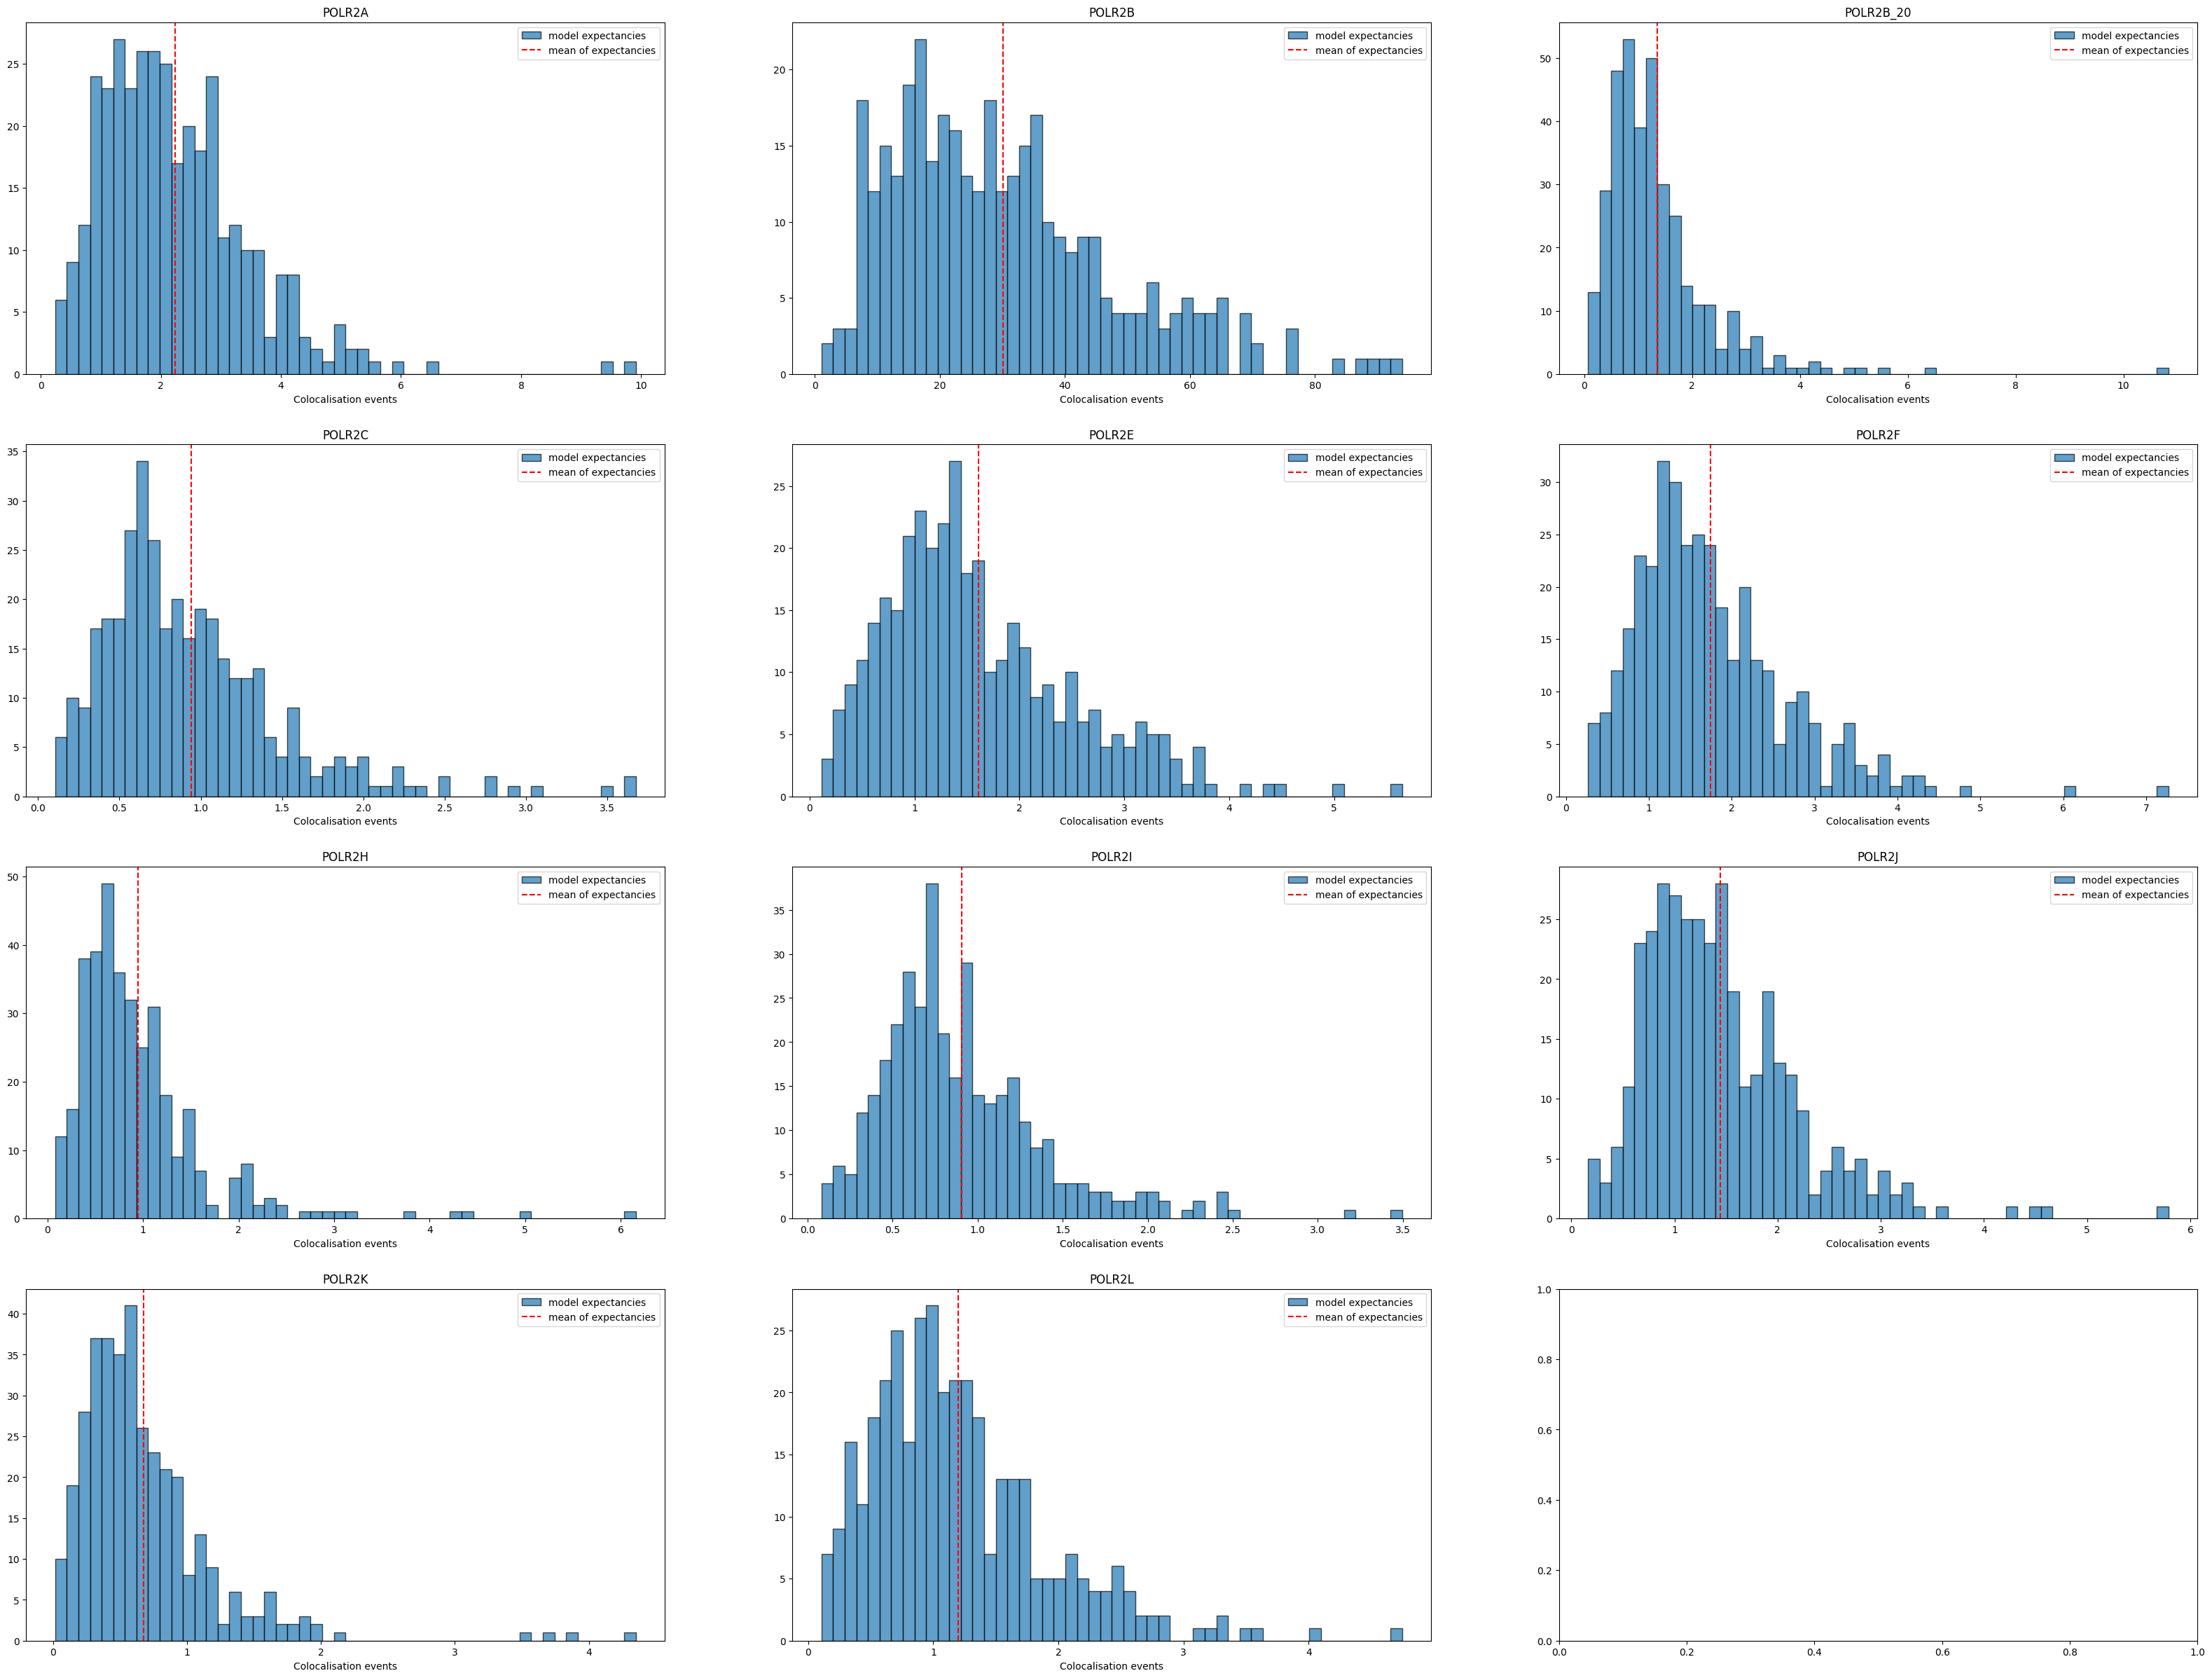

In [21]:
fig = plt.figure(figsize=(40,30))
axes_list = fig.subplots(4,3)
axes_list = sum(axes_list.tolist(),[])

RNA_list = list(
    Spots['target'].unique()
)
RNA_list.sort()

for i,rna in enumerate(RNA_list) :
    ax : plt.Axes = axes_list[i]

    ax.hist(rna_view.loc[rna], bins = 50, alpha = 0.7, edgecolor= 'black', label ="model expectancies")
    ax.set_title(rna)
    # ax.set_xlim(right=6)

    global_expectancy = rna_view.loc[rna].mean(axis=0)
    xmin,xmax,ymin,ymax = ax.axis()
    ax.plot([global_expectancy,global_expectancy],[ymin,ymax],'--r', label = 'mean of expectancies')
    ax.axis([xmin,xmax,ymin,ymax])
    ax.legend()
    ax.set_xlabel("Colocalisation events")


This illustrate why we *can't* consider distribution of colocalisation events to a specifc rna (here **POLR2B**) as a normal distribution of global mean equals to mean of model expectancies. Because the distribution we obtain from our model is not a global normal distribution (global in sense for all cells) it is cell specific. ***What we obtain from our model is collection of differently parametered normal laws***, as illustrated by the histograms above.

To be more precise, we use our model as null hypothesis, to see if the measurement behaves how they would if single molecules were placed randomly in cell. But this null hypothesis is cell specific since they expected mean and standard deviation depends on volume and abundancies, making it impossible to pool all the cells together and expect a global normal distribution.

To solve this issue let us use **z-scores** (standard scores).

## Performin statistical test using z-scores

We want to be able to pool together all the measures and expectations in a global distribution to estimate if measured co-localization behaves under null hypothesis. To do so, we first need to standardiz each cell relative to its own null distribution : we define the **standard score* (z-score) as (measure - expectation)/model_std. In case of valide null hypothesis this center all individual distribution to the Normal distribution N(0,1) meaning we can pool them together and this if global distribution differs significantly from null hypothesis. 

wikipedia : [standard score](https://en.wikipedia.org/wiki/Standard_score)

In [22]:
def compute_z_score(measure, expectancy, expected_std) :
    z_score = (measure - expectancy)/expected_std
    return z_score

In [23]:
def compute_z_score_frame(
        measured_colocalisation_events : pd.DataFrame,
        expected_colocalisation_events : pd.DataFrame,
        expected_standard_deviation : pd.DataFrame, 
        ) :
    if not measured_colocalisation_events.index.equals(expected_colocalisation_events.index) or not measured_colocalisation_events.index.equals(expected_standard_deviation.index) :
        raise ValueError("Cannot compute z score, all dataframe don't shiare the same index")
        
    if not measured_colocalisation_events.columns.equals(expected_colocalisation_events.columns) or not measured_colocalisation_events.columns.equals(expected_standard_deviation.columns) :
        raise ValueError("Cannot compute z score, all dataframe don't share the same columns")
    
    expected_standard_deviation = expected_standard_deviation.replace(0, np.NAN) # Avoid division by 0 error

    z_score_df = measured_colocalisation_events - expected_colocalisation_events
    z_score_df = z_score_df/expected_standard_deviation

    return z_score_df

### Create co-localization events count from data

In [24]:
from Sequential_Fish.tools import safe_merge_no_duplicates
from Sequential_Fish.analysis.colocalisation import colocalisation_truth_df

In [25]:
colocalisation_truth = colocalisation_truth_df(
    Spots=Spots,
    Acquisition=Acquisition,
    Detection=Detection,
    Gene_map=Gene_map,
    Cell=Cell
)
colocalisation_truth

,POLR2A,POLR2B,POLR2B_20,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L,spot_id,location,target,coordinates
spot_id,,,,,,,,,,,,,,,
11,False,False,False,False,False,False,False,False,False,False,False,11,Location-01,POLR2B,"(1000, 4947, 43456)"
13,False,False,False,False,False,False,False,False,False,False,False,13,Location-01,POLR2B,"(1000, 5723, 47239)"
14,False,False,False,False,False,False,False,False,False,False,False,14,Location-01,POLR2B,"(1000, 6402, 43941)"
15,False,False,False,False,False,False,False,False,False,False,False,15,Location-01,POLR2B,"(1000, 6596, 47239)"
16,False,False,False,False,True,False,False,False,False,False,False,16,Location-01,POLR2B,"(1000, 6790, 44620)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610296,False,True,True,False,False,False,False,False,False,False,False,610296,Location-10,POLR2B_20,"(9000, 65378, 36181)"
610372,False,True,False,False,False,False,False,False,False,False,False,610372,Location-10,POLR2B_20,"(9000, 64990, 38121)"
610374,False,True,False,False,False,False,False,False,False,False,False,610374,Location-10,POLR2B_20,"(8600, 77600, 45299)"


# STOP

In [26]:
selfcolocalisation_truth = colocalisation_truth_df(
    Spots=Spots,
    Acquisition=Acquisition,
    Detection=Detection,
    Gene_map=Gene_map,
    Cell=Cell,
    self_colocalization=True
)
selfcolocalisation_truth

,POLR2A,POLR2B,POLR2B_20,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L,spot_id,location,target,coordinates
0,False,False,False,False,False,False,False,False,False,False,False,11,Location-01,POLR2B,"(1000, 4947, 43456)"
1,False,False,False,False,False,False,False,False,False,False,False,13,Location-01,POLR2B,"(1000, 5723, 47239)"
2,False,False,False,False,False,False,False,False,False,False,False,14,Location-01,POLR2B,"(1000, 6402, 43941)"
3,False,False,False,False,False,False,False,False,False,False,False,15,Location-01,POLR2B,"(1000, 6596, 47239)"
4,False,False,False,False,False,False,False,False,False,False,False,16,Location-01,POLR2B,"(1000, 6790, 44620)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365844,False,True,True,False,False,False,False,False,False,False,False,610296,Location-10,POLR2B_20,"(9000, 65378, 36181)"
365845,False,True,False,False,False,False,False,False,False,False,False,610372,Location-10,POLR2B_20,"(9000, 64990, 38121)"
365846,False,False,False,False,False,False,False,False,False,False,False,610374,Location-10,POLR2B_20,"(8600, 77600, 45299)"
365847,False,False,False,False,False,False,False,False,False,False,False,610375,Location-10,POLR2B_20,"(9000, 77600, 45396)"


In [27]:
abundancies

target,POLR2A,POLR2B,POLR2B_20,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L
cell_id,,,,,,,,,,,
0,88,102,35,53,102,106,47,49,74,45,66
1,42,57,24,29,47,35,22,27,41,22,65
2,49,90,39,34,78,78,38,35,94,29,71
3,97,83,26,17,105,96,55,46,81,29,60
4,179,252,96,62,235,160,95,89,153,78,151
...,...,...,...,...,...,...,...,...,...,...,...
356,235,138,195,100,84,111,84,168,130,59,102
357,218,197,166,68,124,201,100,110,124,55,80
358,119,112,73,45,88,90,39,71,88,34,73


In [28]:
colocalisation_truth = safe_merge_no_duplicates(
    colocalisation_truth,
    Spots,
    on='spot_id',
    keys='cell_id'
)
measure_coloc_events = colocalisation_truth.groupby(['target','cell_id'])[RNA_list].sum()
measure_coloc_events.divide(abundancies) # THIS 

POLR2A    POLR2B  POLR2B_20    POLR2C    POLR2E    POLR2F  \
target cell_id                                                                
POLR2A 0        1.000000  0.019608   0.114286  0.113208  0.019608  0.037736   
       1        1.000000  0.000000   0.083333  0.103448  0.000000  0.028571   
       2        1.000000  0.000000   0.051282  0.058824  0.000000  0.000000   
       3        1.000000  0.036145   0.269231  0.117647  0.038095  0.031250   
       4        1.000000  0.031746   0.166667  0.064516  0.051064  0.050000   
...                  ...       ...        ...       ...       ...       ...   
POLR2L 356      0.000000  0.000000   0.000000  0.000000  0.000000  0.009009   
       357      0.013761  0.005076   0.006024  0.000000  0.040323  0.004975   
       358      0.000000  0.000000   0.000000  0.000000  0.011364  0.011111   
       359      0.000000  0.013100   0.000000  0.006173  0.017857  0.005814   
       360      0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   

                  POLR2H    POLR2I    POLR2J    POLR2K    POLR2L  
target cell_id                                                    
POLR2A 0        0.000000  0.020408  0.013514  0.088889  0.000000  
       1        0.045455  0.000000  0.048780  0.000000  0.000000  
       2        0.000000  0.000000  0.021277  0.000000  0.000000  
       3        0.054545  0.021739  0.000000  0.000000  0.016667  
       4        0.042105  0.000000  0.026144  0.000000  0.039735  
...                  ...       ...       ...       ...       ...  
POLR2L 356      0.023810  0.035714  0.107692  0.000000  1.000000  
       357      0.060000  0.036364  0.048387  0.000000  1.000000  
       358      0.000000  0.014085  0.000000  0.000000  1.000000  
       359      0.156682  0.000000  0.138365  0.016393  1.000000  
       360      0.000000  0.019231  0.000000  0.000000  1.000000  

[3971 rows x 11 columns]

In [29]:
measure_coloc_events.columns

Index(['POLR2A', 'POLR2B', 'POLR2B_20', 'POLR2C', 'POLR2E', 'POLR2F', 'POLR2H',
       'POLR2I', 'POLR2J', 'POLR2K', 'POLR2L'],
      dtype='object')

In [30]:
z_score_frame = compute_z_score_frame(
    measured_colocalisation_events= measure_coloc_events,
    expected_colocalisation_events=expected_coloc_events,
    expected_standard_deviation= expected_coloc_events_std
)
z_score_frame

POLR2A    POLR2B  POLR2B_20    POLR2C    POLR2E    POLR2F  \
target cell_id                                                                 
POLR2A 0         6.281135  0.548712   3.793035  5.692428  0.548712  2.101084   
       1        10.499597 -0.842672   3.030693  4.456013 -0.641752  0.811015   
       2         9.483970 -0.940151   2.222608  2.570881 -0.893287 -0.839384   
       3         6.332943  1.895627   8.448311  2.247185  2.313383  1.613275   
       4         5.101308  2.155867  10.826011  2.803461  4.368609  3.368747   
...                   ...       ...        ...       ...       ...       ...   
POLR2L 356      -1.456478 -1.218907  -1.474978 -1.203651 -1.227837 -0.108803   
       357       1.382803 -0.252606  -0.131024 -0.845832  4.353378 -0.223431   
       358      -1.043097 -1.043097  -0.882768 -0.777339  0.203828  0.181149   
       359      -1.644936  0.568565  -1.424791 -0.639165  0.998038 -0.732576   
       360      -0.765246 -0.639407  -0.613283 -0.589326 -0.581563 -0.667343   

                   POLR2H    POLR2I     POLR2J    POLR2K     POLR2L  
target cell_id                                                       
POLR2A 0        -0.882180  0.172368  -0.066981  3.934239  -1.002162  
       1         1.261297 -0.595321   2.768317 -0.648611  -0.772613  
       2        -0.702640 -0.639178   1.282103 -0.631004  -0.800318  
       3         2.238740  0.145423  -1.105204 -0.807574   0.231802  
       4         1.732338 -1.187191   0.963757 -1.130668   2.370736  
...                   ...       ...        ...       ...        ...  
POLR2L 356       0.556281  2.554567   9.638688 -1.178220   6.118501  
       357       6.005318  2.869855   5.312928 -0.775836   8.441720  
       358      -0.693532  0.290274  -0.938082 -0.724198   7.294260  
       359      21.028639 -1.239680  16.584280  0.579956   5.412638  
       360      -0.712033  1.319162  -0.777427 -0.726890  13.725775  

[3971 rows x 11 columns]

### Some visualisation

Let's consider again the colocalisation events with POLR2B : C(i,'POLR2B').

In [31]:
from scipy.stats import norm
from scipy.stats import shapiro #normality test
from scipy.stats import wilcoxon

In [32]:
RNA = 'POLR2J'
rna_view = z_score_frame.loc[:,[RNA]]

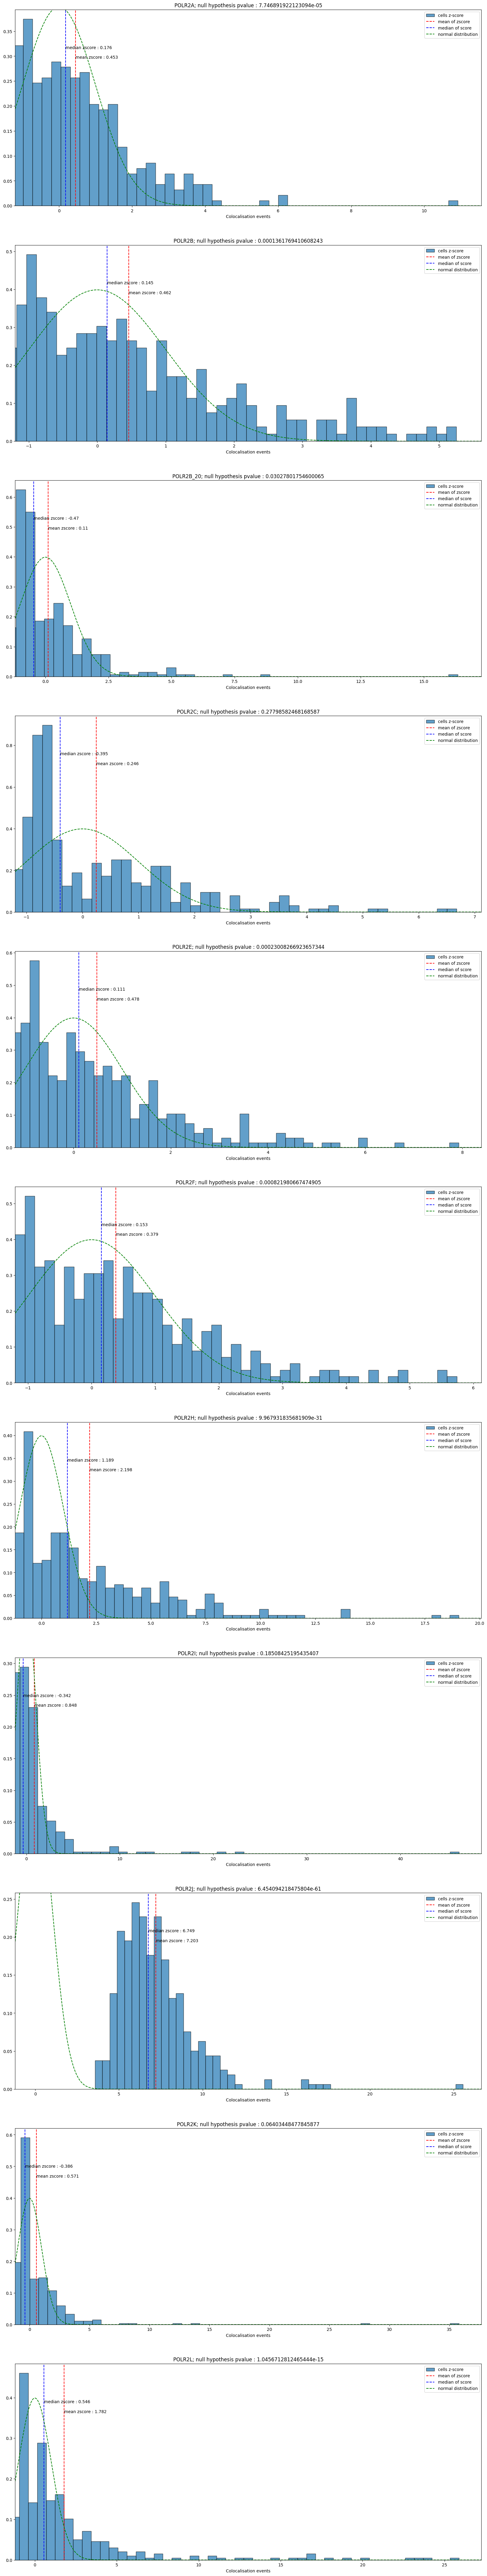

In [33]:
rna_number = len(RNA_list)
fig = plt.figure(figsize=(20,rna_number*10))
axes_list = fig.subplots(rna_number,1)
# axes_list = sum(axes_list.tolist(),[])



RNA_list = list(
    Spots['target'].unique()
)
RNA_list.sort()

for i,rna in enumerate(RNA_list) :
    ax : plt.Axes = axes_list[i]

    ax.hist(rna_view.loc[rna], bins = 50, alpha = 0.7, edgecolor= 'black', label ="cells z-score", density=True)
    # ax.set_xlim(right=6)

    #z-score distribution
    global_expectancy = rna_view.loc[rna].mean(axis=0)
    global_median = rna_view.loc[rna].median()
    xmin,xmax,ymin,ymax = ax.axis()
    xmin = -1.2
    ax.plot([global_expectancy,global_expectancy],[ymin,ymax],'--r', label = 'mean of zscore')
    ax.plot([global_median,global_median],[ymin,ymax],'--b', label = 'median of score')
    ax.axis([xmin,xmax,ymin,ymax])
    ax.set_xlabel("Colocalisation events")


    #Normal distribution
    x = np.linspace(xmin,xmax,1000)
    normal_distribution = norm.pdf(x)
    ax.plot(x,normal_distribution,'--g', label= 'normal distribution')

    #Normality test
    # normality_score = shapiro(rna_view.loc[rna]).pvalue

    #p-value
    statistic, pvalue = wilcoxon(rna_view.loc[rna])

    ax.set_title(f"{rna}; null hypothesis pvalue : {pvalue[0]}")
    ax.text(float(global_expectancy),3*ymax/4, s=f"mean zscore : {float(global_expectancy.round(3))}")
    ax.text(float(global_median),4*ymax/5, s=f"median zscore : {float(global_median.round(3))}")
    ax.legend()

Also the normality scores are not high so it is preferable to use a non parametric test for p-values computation such as Wilcoxon signed-rank test

Lets compute pvalues for all pairs

In [34]:
def compute_wilcoxon_signed_rank(zscore_distribution)->pd.Series :

    if isinstance(zscore_distribution, (pd.Series, pd.DataFrame)) :
        name = zscore_distribution.name
    else :
        name = None

    statistic, pvalue = wilcoxon(zscore_distribution)

    if isinstance(pvalue, (int, float)) : pvalue = [pvalue]
    if isinstance(zscore_distribution, pd.DataFrame) :
        res = pd.DataFrame(columns=zscore_distribution.columns, data=pvalue.reshape(1,-1), index=[name])
    else :
        res = pd.Series(pvalue, name=name)
    return res

In [35]:
pvalue_frame = z_score_frame.groupby(axis=0,level=0).apply(lambda x: compute_wilcoxon_signed_rank(x)).droplevel(axis=0, level=1)

Lets have a global look with a heatmap

In [36]:
#Put non significative to NaN
significance = 1e-4
pvalue_mask = pvalue_frame <= significance

In [37]:
z_score_frame_median = z_score_frame.groupby(axis=0, level=0).median()
z_score_frame_median = z_score_frame_median * pvalue_mask
z_score_frame_median

,POLR2A,POLR2B,POLR2B_20,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L
target,,,,,,,,,,,
POLR2A,4.755009,0.883293,6.545591,2.279959,1.039977,0.639303,0.000000,-0.000000,0.175668,-0.000000,0.000000
POLR2B,0.861794,5.049009,38.022677,-0.000000,0.328057,-0.000000,-0.729600,-0.000000,0.000000,-0.000000,-0.000000
POLR2B_20,5.730756,33.692523,8.048615,2.405741,0.876910,0.310808,-0.000000,-0.627642,-0.000000,-0.624403,-0.589069
POLR2C,3.298157,-0.000000,3.136282,10.558258,0.986870,0.241907,-0.556205,-0.000000,-0.000000,-0.546064,-0.000000
POLR2E,1.633739,0.384348,0.553266,0.969580,6.150146,0.578835,-0.000000,-0.000000,0.000000,-0.000000,0.279001
POLR2F,0.993592,-0.000000,0.412717,0.185389,0.722493,5.786855,0.340415,-0.000000,0.000000,-0.677850,-0.000000
POLR2H,0.480244,-0.000000,0.241697,-0.000000,-0.000000,1.329061,11.159001,-0.000000,1.189282,-0.536539,-0.000000
POLR2I,-0.000000,0.000000,-0.593423,-0.000000,0.000000,-0.000000,-0.000000,10.713708,-0.000000,-0.000000,0.544771
POLR2J,0.347256,0.113294,-0.000000,-0.000000,0.201457,0.240775,1.188928,-0.000000,6.749480,-0.000000,0.299105


In [38]:
z_score_frame_mean = z_score_frame.groupby(axis=0, level=0).mean()
z_score_frame_mean = z_score_frame_mean * pvalue_mask
z_score_frame_mean

,POLR2A,POLR2B,POLR2B_20,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L
target,,,,,,,,,,,
POLR2A,5.110079,1.153495,10.475865,3.014712,1.455834,0.863864,0.000000,0.000000,0.453365,0.000000,0.000000
POLR2B,1.062032,5.346681,38.760625,-0.000000,0.637821,0.000000,-0.294334,0.000000,0.000000,0.000000,0.000000
POLR2B_20,7.004575,34.349107,9.025427,3.431936,1.381517,0.838467,0.000000,-0.207739,0.000000,-0.218461,-0.131966
POLR2C,5.775788,0.000000,5.853320,11.647386,1.485906,0.477276,-0.147327,0.000000,0.000000,-0.213677,0.000000
POLR2E,2.282961,0.602865,1.922147,2.436025,6.972898,0.915561,-0.000000,0.000000,0.000000,-0.000000,0.487591
POLR2F,2.097295,0.000000,2.037805,1.235071,2.386386,6.147859,0.919559,0.000000,0.000000,-0.240082,0.000000
POLR2H,2.192227,0.000000,2.513980,0.000000,0.000000,5.656973,12.245562,0.000000,2.198070,-0.059915,0.000000
POLR2I,0.000000,0.000000,0.176831,0.000000,0.000000,0.000000,0.000000,11.413021,0.000000,0.000000,3.035980
POLR2J,0.878257,0.454245,0.000000,0.000000,0.623545,1.190554,3.620710,0.000000,7.203020,0.000000,0.675631


In [39]:
from matplotlib.colors import LogNorm, Normalize, AsinhNorm
from matplotlib.cm import get_cmap

In [40]:
def plot_heatmap(data : pd.DataFrame, vmin, vmax, cmap=None, ax= None, log=False) :
    
    if ax is None :
        fig = plt.figure(figsize=(12,10))
        ax = fig.gca()
    ax.invert_yaxis()
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    
    
    if cmap is None : 
        cmap = get_cmap('inferno')
    
    if log : 
        norm = LogNorm(vmin=vmin, vmax=vmax)
    else :
        norm = AsinhNorm(vmin=vmin, vmax=vmax, linear_width=1)
    
    cmap.set_bad('gray',0.7)

    colormesh = ax.pcolormesh(
        data,
        norm=norm,
        cmap=cmap,
        edgecolor = 'white',
        )

    x_pos = np.arange(len(data.columns)) + 0.5
    y_pos = np.arange(len(data.index)) + 0.5
    ax.set_xticks(x_pos, data.columns, rotation = 30)
    ax.set_yticks(y_pos, data.index)

    cbar = plt.colorbar(colormesh, ax=ax)
        
    if ax is None :
        return fig
    else :
        return ax
    

/tmp/ipykernel_714923/3609803310.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('inferno')


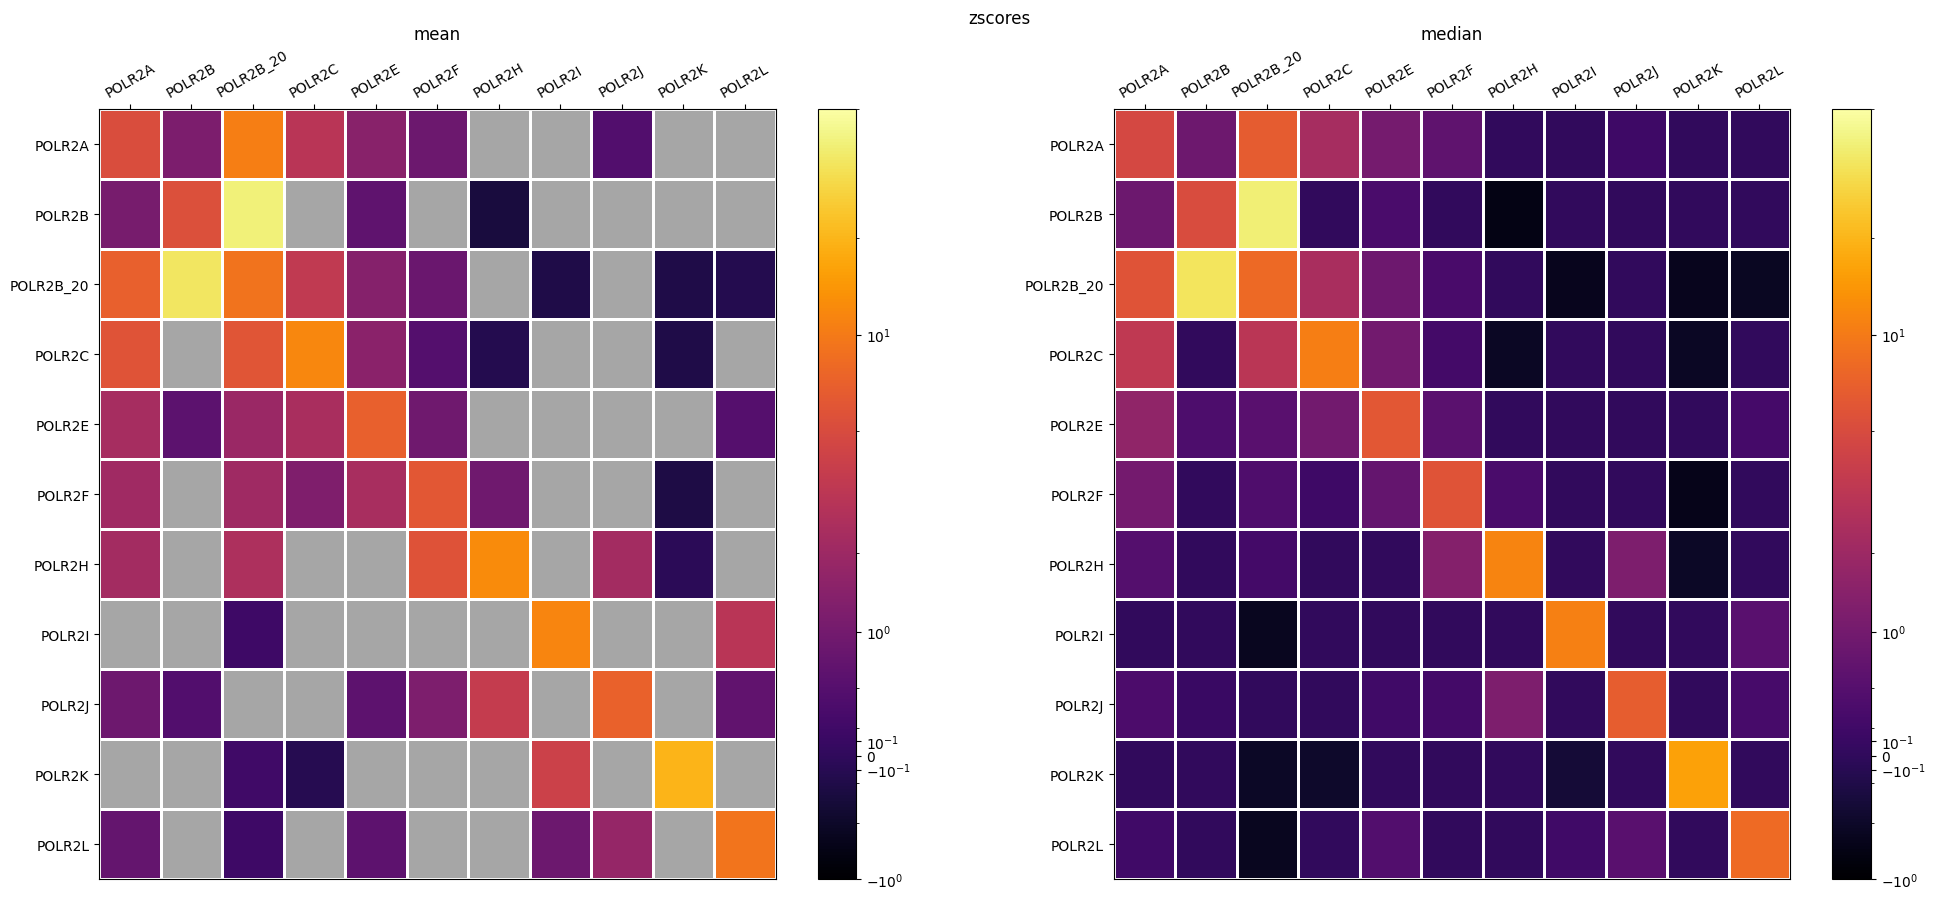

In [41]:
fig = plt.figure(figsize=(24,10))
left,right = fig.subplots(1,2)
right.set_title("median")
plot_heatmap(z_score_frame_median, vmin=-1, vmax=50, ax=right)
left.set_title("mean")
plot_heatmap(z_score_frame_mean.replace(0,np.NaN), vmin=-1, vmax=50, ax=left)
fig.suptitle("zscores")
pass